 Clustering hospitals according to their bed capacity:

Suppose a crisis management board has been initiated and wants to learn the hospital characteristics in terms of their capabilities to handle the high utilisation event of COVID-19. Your task is to conduct clustering on this dataset and describe the minimum number of effective clusters identified.
 

In [1]:
#importing Libaries 
import pandas as pd


In [27]:
#reading data from csv file 
df=pd.read_csv("usa_hospital_beds.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6640 entries, 0 to 6639
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   X                                6622 non-null   float64
 1   Y                                6622 non-null   float64
 2   OBJECTID                         6640 non-null   int64  
 3   HOSPITAL_NAME                    6640 non-null   object 
 4   HOSPITAL_TYPE                    6640 non-null   object 
 5   HQ_ADDRESS                       6640 non-null   object 
 6   HQ_CITY                          6640 non-null   object 
 7   HQ_STATE                         6640 non-null   object 
 8   HQ_ZIP_CODE                      6640 non-null   int64  
 9   COUNTY_NAME                      6615 non-null   object 
 10  STATE_NAME                       6615 non-null   object 
 11  NUM_LICENSED_BEDS                6444 non-null   float64
 12  NUM_STAFFED_BEDS    

In [32]:
df

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,COUNTY_NAME,STATE_NAME,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
0,-112.066157,33.495498,1,Phoenix VA Health Care System (AKA Carl T Ha V...,VA Hospital,650 E Indian School Rd,Phoenix,AZ,85012,Maricopa,Arizona,129.0,129.0,0,0,NaN,0,0.0
1,-110.965885,32.181263,2,Southern Arizona VA Health Care System,VA Hospital,3601 S 6th Ave,Tucson,AZ,85723,Pima,Arizona,295.0,295.0,2,2,NaN,0,2.0
2,-119.779742,36.773323,3,VA Central California Health Care System,VA Hospital,2615 E Clinton Ave,Fresno,CA,93703,Fresno,California,57.0,57.0,2,2,NaN,0,2.0
3,-72.957610,41.284400,4,VA Connecticut Healthcare System - West Haven ...,VA Hospital,950 Campbell Ave,West Haven,CT,6516,New Haven,Connecticut,216.0,216.0,1,1,NaN,0,2.0
4,-75.606533,39.740206,5,Wilmington VA Medical Center,VA Hospital,1601 Kirkwood Hwy,Wilmington,DE,19805,New Castle,Delaware,60.0,60.0,0,0,NaN,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6635,-93.712727,32.449542,6636,Shreveport Rehabilitation Hospital,Rehabilitation Hospital,1451 Fern Cir,Shreveport,LA,71105,Caddo,Louisiana,NaN,NaN,0,0,NaN,0,NaN
6636,-76.151657,36.788612,6637,Pleasant Valley Medical Center,Short Term Acute Care Hospital,4221 Pleasant Valley Rd,Virginia Beach,VA,23464,Virginia Beach,Virginia,NaN,NaN,0,0,NaN,0,NaN
6637,-91.099236,30.399164,6638,Sage Specialty Hospital - Baton Rouge,Short Term Acute Care Hospital,8225 Summa Ave,Baton Rouge,LA,70809,East Baton Rouge,Louisiana,NaN,NaN,0,0,NaN,0,NaN
6638,-80.815620,34.189204,6639,Midlands Regional Rehabilitation Hospital,Rehabilitation Hospital,20 Pinnacle Pkwy,Elgin,SC,29045,Kershaw,South Carolina,NaN,NaN,0,0,NaN,0,NaN


In [30]:
df.describe()

,X,Y,OBJECTID,HQ_ZIP_CODE,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
count,6622.000000,6622.000000,6640.000000,6640.000000,6444.000000,6360.000000,6640.000000,6640.000000,5907.000000,6640.000000,6521.000000
mean,-92.566564,37.524093,3320.500000,53912.605120,148.954997,128.712107,13.932530,13.932530,0.493387,21.273645,3.568471
std,16.104124,5.692132,1916.947226,27246.998958,181.836163,159.023374,22.430713,22.430713,0.235928,70.096080,5.478285
min,-170.685773,-14.290190,1.000000,603.000000,1.000000,1.000000,0.000000,0.000000,0.000329,-883.000000,0.000000
25%,-98.285496,33.580311,1660.750000,32419.250000,26.000000,25.000000,3.000000,3.000000,0.301370,0.000000,0.000000
50%,-90.152566,38.240635,3320.500000,55395.500000,76.500000,67.000000,6.000000,6.000000,0.498326,0.000000,2.000000
75%,-82.031227,41.441194,4980.250000,76464.250000,199.000000,168.000000,16.000000,16.000000,0.678513,22.000000,4.000000
max,145.724170,71.298900,6640.000000,99929.000000,2059.000000,2247.000000,310.000000,310.000000,1.000000,1446.000000,61.000000


In [31]:
# get more information about Hospital Type
print(df['HOSPITAL_TYPE'].describe())
print(df['HOSPITAL_TYPE'].value_counts())

count                               6640
unique                                 9
top       Short Term Acute Care Hospital
freq                                3550
Name: HOSPITAL_TYPE, dtype: object
Short Term Acute Care Hospital                   3550
Critical Access Hospital                         1344
Psychiatric Hospital                              707
Long Term Acute Care Hospital                     361
Rehabilitation Hospital                           344
VA Hospital                                       159
Childrens Hospital                                123
Department of Defense Hospital                     36
Religious Non-Medical Health Care Institution      16
Name: HOSPITAL_TYPE, dtype: int64


# Build a clustering model to profile the hospitals based on the beds and ventilators' capacity. 


Visualing 3 variables

c:\users\gk\documents\environments\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


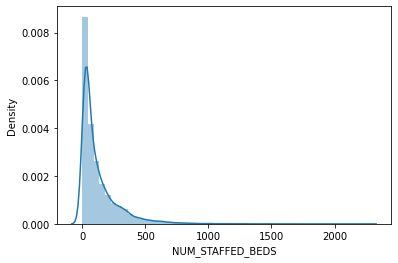

c:\users\gk\documents\environments\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


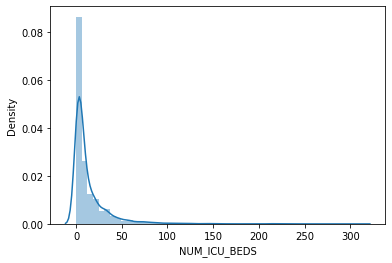

c:\users\gk\documents\environments\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


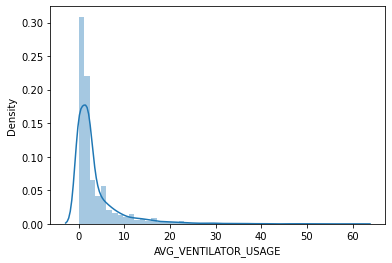

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Staffed bed
num_staffed_bed_dist = sns.distplot(df['NUM_STAFFED_BEDS'].dropna())
plt.show()

# Distribution of ICU Bed
num_icu_beds_dist = sns.distplot(df['NUM_ICU_BEDS'].dropna())
plt.show()

# Distribution of average Ventilator Usage
avg_ven_dist = sns.distplot(df['AVG_VENTILATOR_USAGE'].dropna())

plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6640 entries, 0 to 6639
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   X                                6622 non-null   float64
 1   Y                                6622 non-null   float64
 2   OBJECTID                         6640 non-null   int64  
 3   HOSPITAL_NAME                    6640 non-null   object 
 4   HOSPITAL_TYPE                    6640 non-null   object 
 5   HQ_ADDRESS                       6640 non-null   object 
 6   HQ_CITY                          6640 non-null   object 
 7   HQ_STATE                         6640 non-null   object 
 8   HQ_ZIP_CODE                      6640 non-null   int64  
 9   COUNTY_NAME                      6615 non-null   object 
 10  STATE_NAME                       6615 non-null   object 
 11  NUM_LICENSED_BEDS                6444 non-null   float64
 12  NUM_STAFFED_BEDS    